In [13]:
try:
    from undi import MuonNuclearInteraction
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('/home/misah/PARMA/WORK/undi-master/undi/')
    from undi import MuonNuclearInteraction
import matplotlib.pyplot as plt
import numpy as np

In [14]:
angtom=1.0e-10 # m
a=9.5672616959 # V3Ge supercell lattice constant, in Angstrom

V_Quadrupole_moment =  -0.05e-28 # m^-2
OmegaQmu=2.94e6 # s^-1
    
atoms = [
    
    {'Position': np.array([0.124721254,   0.124772828,   0.124836008]) * a * angtom,
     'Label': 'mu'},

    {'Position': np.array([-0.0, 0.253818420,   0.125000491])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     'OmegaQmu': OmegaQmu
    },
    
    {'Position': np.array([0.124979121,  -0.00,   0.253831436])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     'OmegaQmu': OmegaQmu
    },
    
    {'Position': np.array([0.253794630,   0.124988309,  -0.0])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     'OmegaQmu': OmegaQmu
    },
#    
#    {'Position': np.array([0.5    ,    0.5   ,     0.0])*angtom*a,
#    'Label': 'V',
#    'ElectricQuadrupoleMoment': V_Quadrupole_moment,
#    # 'OmegaQmu': 3.2e6 # s^-1
#    },
#    
#    {'Position': np.array([0.5    ,    0.5   ,     1.0])*angtom*a,
#     'Label': 'V',
#     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
#     # 'OmegaQmu': 3.2e6 # s^-1
#    }
]

In [15]:
elementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second

def Vzz_for_unit_charge_at_distance(r):
    epsilon0 = 8.8541878E-12 # ampere^2 ⋅ kilogram^−1 ⋅ meter^−3 ⋅ second^4
    elementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second
    Vzz = (2./(4 * np.pi * epsilon0)) * (elementary_charge / (r**3))
    return Vzz

def Vzz_from_Celio_PRL():
    # 0.27 angstrom^−3 is from PRL 39 836
    # (4 pi epsilon_0)^−1 (0.27 angstrom^−3) elementary_charge = 3.8879043E20 meter^−2 ⋅ volts
    Vzz = 1.02702 * 3.8879043E20 # the factor 1.02702 gives exactly 3.2e6 s^-1 for omega_q
    return Vzz

def Vzz_Vanad():
    # 0.27 angstrom^−3 is from PRL 39 836
    # (4 pi epsilon_0)^−1 (0.27 angstrom^−3) elementary_charge = 3.8879043E20 meter^−2 ⋅ volts
    Vzz = 1.02702 * 3.8879043E20 # the factor 1.02702 gives exactly 3.2e6 s^-1 for omega_q
    return Vzz

def get_V(p_mu, p_N, Vzz):
    x=p_N-p_mu
    n = np.linalg.norm(x)
    x /= n; r = 1. # keeping formula below for clarity
    return -Vzz * ( (3.*np.outer(x,x)-np.eye(3)*(r**2))/r**5 )


# for idx, atom in enumerate(atoms):
#     if atom['Label'] == 'V':
#         atoms[idx]['EFGTensor'] = get_V(atoms[0]['Position'], atom['Position'], \
#                                   1*Vzz_for_unit_charge_at_distance(1.77*angtom))
# print(1*Vzz_for_unit_charge_at_distance(1.77*angtom))

In [16]:
steps = 100
tlist = np.linspace(0, 18e-6, steps)
signals = np.zeros([6,steps], dtype=np.float)

# efgray=np.arange(10,15,5)

# for efg, j in enumerate(efgray):
#     for idx, atom in enumerate(atoms):
#         if atom['Label'] == 'V':
#             atoms[idx]['EFGTensor'] = get_V(atoms[0]['Position'], atom['Position'], \
#                                       j*Vzz_for_unit_charge_at_distance(1.71*angtom))
            
#             #print(atoms[idx])

if True:
    NS = MuonNuclearInteraction(atoms, log_level='info')

    # rotate the sumple such that the muon spin is aligned with
    # the 111 direction (and, just for convenience, the muon position is
    # set to (0,0,0) )
    NS.translate_rotate_sample_vec(np.array([1.,1.,1.]))

    print("Computing signal 4 times with ZF with  {} times efg...".format(0), end='', flush=True)
    signal_Cu = NS.celio(tlist,  k=2)
    for i in range(3):
        print('{}...'.format(i+1), end='', flush=True)
        signal_Cu += NS.celio(tlist, k=2)
    print('done!')
    signal_Cu /= float(i+1+1)
    del NS

    signals=signal_Cu

# """
# ...and the results is:
# """

# fig, axes = plt.subplots(1,1)
# for i, Bmod in enumerate(efgray):
#     color = list(np.random.choice(range(256), size=3)/256)
#     axes.plot(tlist, signals[i], label='{} G'.format(Bmod*1e4), linestyle='-', color=color)
# axes.set_ylim((-0.3,1.1))
# ticks = np.round(axes.get_xticks()*10.**6)
# axes.set_xticklabels(ticks)
# plt.legend()
# plt.show()

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


Computing signal 4 times with ZF with  0 times efg...1...2...3...done!


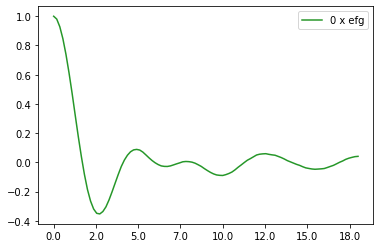

In [17]:
fig, axes = plt.subplots(1,1)
#for i, Bmod in enumerate(efgray):
color = list(np.random.choice(range(256), size=3)/256)
axes.plot(tlist, signal_Cu, label='{} x efg'.format(0*1), linestyle='-', color=color)
#axes.set_ylim((-0.5,1.1))
ticks = np.round(axes.get_xticks()*10.**6)
axes.set_xticklabels(ticks)
plt.legend()
plt.show()

In [1]:
# ## the bamuba function
# sys.path.insert(0, '/home/misah/PARMA/WORK/undi-master/examples/v3ge/')
# #import bamuba as b
# from bamuba import plot_bamuba
# tlist0 = np.linspace(0, 18, 1000)
# y=plot_bamuba(tlist0)
# fig, axes = plt.subplots(1,1)
# #for i, Bmod in enumerate(efgray):
# color = list(np.random.choice(range(256), size=3)/256)
# axes.plot(tlist, signal_Cu*0.2191, label='{} x efg'.format(0*1), linestyle='-', color=color)
# axes.plot(tlist0*1e-6,y, label='Expt', linestyle=':')
# #axes.set_ylim((-0.3,1.1))
# #axes.set_xlim((0.,max(tlist)))
# ticks = np.round(axes.get_xticks()*10.**6)
# axes.set_xticklabels(ticks)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

NameError: name 'sys' is not defined